In [1]:
pip install numpy

  Using cached numpy-1.18.5-cp37-cp37m-macosx_10_9_x86_64.whl (15.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scipy

  Using cached scipy-1.4.1-cp37-cp37m-macosx_10_6_intel.whl (28.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

  Using cached matplotlib-3.2.1-cp37-cp37m-macosx_10_9_x86_64.whl (12.4 MB)
  Using cached kiwisolver-1.2.0-cp37-cp37m-macosx_10_9_x86_64.whl (60 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


def ydot(y, t):
	FA = y[0]
	FB = y[1]
	FC = y[2]

	k = 0.7
	kc = 0.2
	Kc = 0.05
	CTO = 0.2

	CA = CTO * (FA / np.sum(y))
	CB = CTO * (FB / np.sum(y))
	CC = CTO * (FC / np.sum(y))

	rate = k * (CA - ((CB * CC)) / Kc)

	return (-rate, rate - kc * CB, rate)


y0 = [10, 0, 0]
t = 500
tspan = np.linspace(0, t, 100)

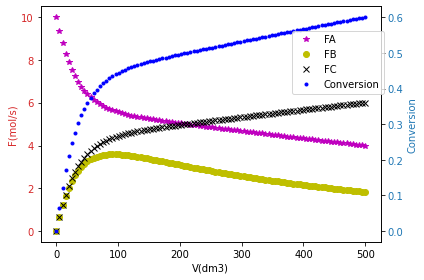

In [72]:
y = odeint(ydot, y0, tspan)
X = 1 - y[:,0]/y0[0]

fig, ax1 = plt.subplots()
color = 'tab:red'
line_shape = ['m*', 'yo', 'kx']
ax1.set_xlabel('V(dm3)')
ax1.set_ylabel('F(mol/s)', color = color)
ax1.tick_params(axis='y', labelcolor = color)

for i in range(3):
    ax1.plot(tspan, y[:, i], line_shape[i])
    
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Conversion', color = color)
ax2.tick_params(axis='y', labelcolor = color)
ax2.plot(tspan, X, 'b.')
fig.legend(['FA', 'FB', 'FC', 'Conversion'], loc='lower right', ncol=1, bbox_to_anchor=(0.9, 0.63))
fig.tight_layout()
plt.show()

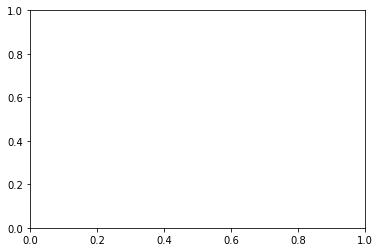

Text(0.5, 3.1999999999999993, 'V(dm3)')

Text(3.200000000000003, 0.5, 'F(mol/s)')

Text(0, 0.5, 'Conversion')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>
